0.6,0.1,0.3
0.2,0.3,0.5
0.2,0.6,0.2


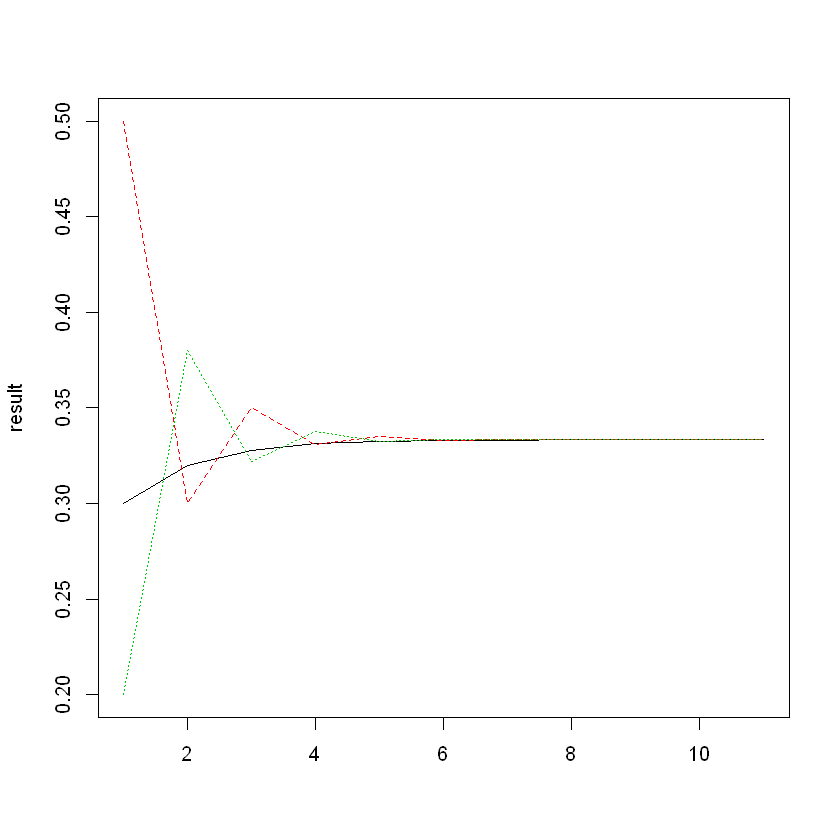

In [18]:
#Simulate the change of fraction per status.
#I : Initiate Status, M : Transition matrix, t is the time point
#the proportion for each time point is output
Simulation <- function(I,M,t){
    result <- matrix(NA,t+1,ncol(I))
    result[1,] <- I
    for(i in 1:t){
        I <- I %*% M
        result[i+1,] <- I
    }
    return(result)
}

#rowSums
M <- matrix(c(0.6,0.2,0.2,0.1,0.3,0.6,0.3,0.5,0.2),3,3)
M
rownames(M) <- colnames(M) <- c("A","B","C")
I <- t(as.matrix(c(0.3,0.5,0.2)))
result <- Simulation(I,M,10)
matplot(result,type="l")

In [24]:
#Draw a graph whose nodes are statuses and edges are transition among them. 
#Make the size of vertices proportional to the fraction in the population at a particular point. 
#Make the width of edges proportional to the probability in transition.
library(igraph)
g <- graph.adjacency(M,weighted=TRUE)

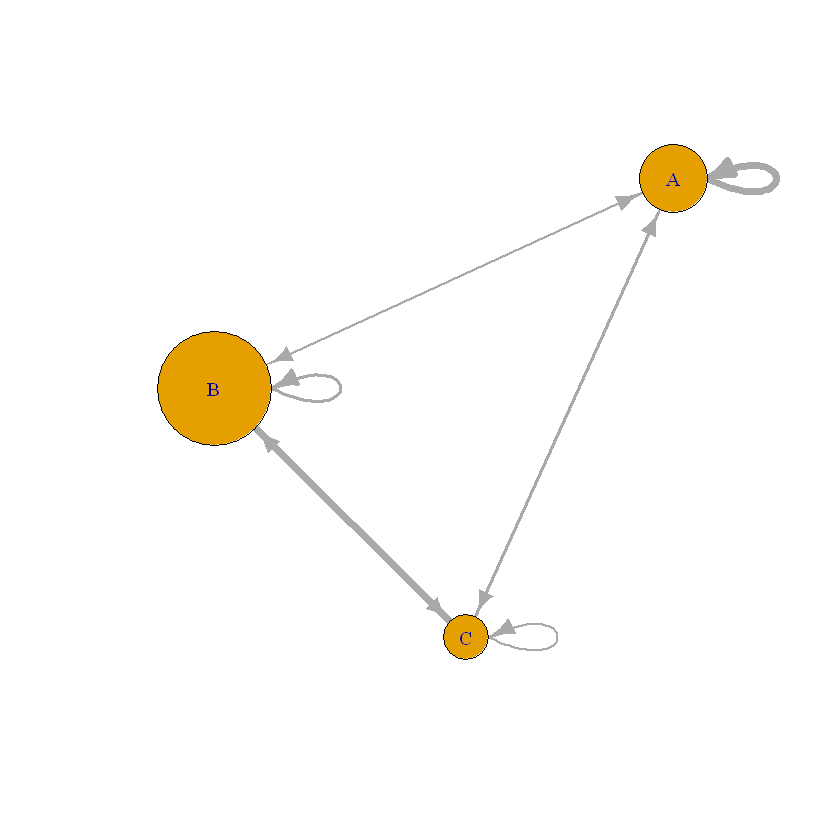

In [32]:
plot(g, vertex.size=I*100,edge.width=(E(g)$weight)*10)

In [30]:
E(g)$weight

[1] 0.6 0.1 0.3 0.2 0.3 0.5 0.2 0.6 0.2